# BE PROPULSION : Exploitation d'un modèle de turbofan.

Notes data de base du modèle amenées à varier:
- OPR = 40
- Tt4 = 1600 K
- BPR = LAMBDA = 11

## QUESTION 2

In [4]:
# importer le modèle
from TurboFan_model import TurboFan

# definir les datas pour plot 
nbOPR = 100
nbTt4 = 5
OPR_data = []
ETA_th_data = []
Tt4_plots = []

# récolter les datas
for i in range(nbTt4):
    baseTt4 = 1500
    finTt4 = 1700
    Tt4 = baseTt4 + ((finTt4-baseTt4)/nbTt4)*i
    for j in range(nbOPR):
        baseOPR = 35
        finOPR = 45
        OPR = baseOPR + ((finOPR-baseOPR)/nbOPR)*j
        engine = TurboFan(OPR, Tt4)
        OPR_data.append(OPR)
        ETA_th_data.append(engine.ETA_thermique)
    Tt4_plots.append([OPR_data, ETA_th_data])
    OPR_data = []
    ETA_th_data = []



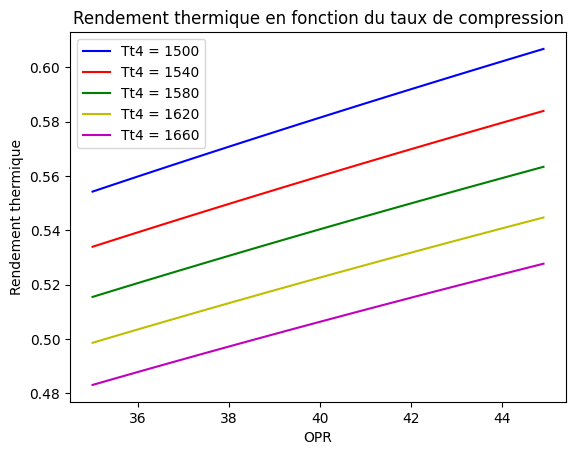

In [5]:
import matplotlib.pyplot as plt

colors = ['b', 'r', 'g', 'y', 'm']  # Add more colors if needed

for i, Tt4 in enumerate(Tt4_plots):
    plt.plot(Tt4[0], Tt4[1], marker='', linestyle='-', color=colors[i%5], label=f'Tt4 = {int(baseTt4 + ((finTt4-baseTt4)/nbTt4)*i)}')

# Add labels and title
plt.xlabel('OPR')
plt.ylabel('Rendement thermique')
plt.title('Rendement thermique en fonction du taux de compression')

# Add a legend
plt.legend()

## QUESTION 3

[5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5]
[138.16592095297176, 135.88688821754818, 134.3675330605991, 133.28227937706407, 132.4683391144128, 131.83527446568402, 131.328822746701, 130.91445315844217, 130.56914516822644, 130.27696148419778]


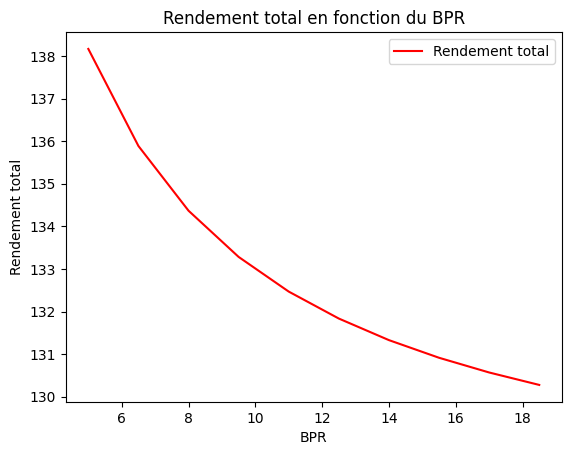

In [6]:
# importer le modèle
from TurboFan_model import TurboFan

# definir les datas pour plot 
nbBPR = 10
BPR_data = []
ETA_global_data = []
ETA_global_data2 = []

# récolter les datas
for i in range(nbBPR):
    baseBPR = 5
    finBPR = 20
    BPR = baseBPR + ((finBPR-baseBPR)/nbBPR)*i
    engine = TurboFan(40, 1600, BPR)
    BPR_data.append(BPR)
    ETA_global_data.append(engine.ETA_toal)

print(BPR_data)
print(ETA_global_data)

plt.plot(BPR_data, ETA_global_data, marker='', linestyle='-', color='r', label='Rendement total')

# Add labels and title
plt.xlabel('BPR')
plt.ylabel('Rendement total')
plt.title('Rendement total en fonction du BPR')

# Add a legend
plt.legend()